# Tutorial 5 : U-GNP [WIP]

Last Update : 22 June 2019

**Aim**: 


In [1]:
N_THREADS = 8
# Nota Bene : notebooks don't deallocate GPU memory
IS_FORCE_CPU = False # can also be set in the trainer

## Environment

In [2]:
cd ..

/master


In [3]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CENTER PLOTS
from IPython.core.display import HTML
display(HTML(""" <style> .output_png {display: table-cell; text-align: center; margin:auto; }
.prompt display:none;}  </style>"""))

import os
if IS_FORCE_CPU:
    os.environ['CUDA_VISIBLE_DEVICES'] = ""
    
import sys
sys.path.append("notebooks")

import numpy as np
import matplotlib.pyplot as plt
import torch
torch.set_num_threads(N_THREADS)

Autosaving every 600 seconds


## Dataset

The dataset we will be using are simple functions sampled from different Gaussian kernel. See [Tutorial 1 - Conditional Neural Process] for more details.

[Tutorial 1 - Conditional Neural Process]: Tutorial%201%20-%20Conditional%20Neural%20Process.ipynb

In [4]:
from utils.visualize import plot_posterior_samples, plot_prior_samples, plot_dataset_samples
from ntbks_helpers import get_gp_datasets # defined in first tutorial (CNP)

X_DIM = 1  # 1D spatial input
Y_DIM = 1  # 1D regression
N_POINTS = 128
N_SAMPLES = 100000 # this is a lot and can work with less
datasets = get_gp_datasets(n_samples=N_SAMPLES, n_points=N_POINTS)

## Model


In [5]:
from neuralproc import GlobalNeuralProcess, discard_ith_arg
from neuralproc.utils.helpers import change_param
from neuralproc.utils.datasplit import CntxtTrgtGetter, GetRandomIndcs
from neuralproc.utils.setcnn import MlpRBF, SetConv
from neuralproc.predefined import UnetCNN, CNN, SelfAttention, MLP

get_cntxt_trgt = CntxtTrgtGetter(contexts_getter=GetRandomIndcs(min_n_indcs=0.01, max_n_indcs=.5),
                                 targets_getter=GetRandomIndcs(min_n_indcs=0.5, max_n_indcs=0.99),
                                 is_add_cntxts_to_trgts=False)  # don't context points to tagrtes

gnp_kwargs = dict(is_summary=False,
                  r_dim=16, 
                  get_cntxt_trgt=get_cntxt_trgt,
                  TmpSelfAttn=change_param(UnetCNN,
                                          Conv=torch.nn.Conv1d,
                                           Pool=torch.nn.MaxPool1d,
                                           upsample_mode="linear",
                                          n_layers=10,
                                           bottleneck=None,
                                          is_depth_separable=True,
                                          Normalization=torch.nn.BatchNorm1d,
                                          is_chan_last=True,
                                           is_double_conv=True,
                                          kernel_size=7),
                  keys_to_tmp_attn=change_param(SetConv, is_vanilla=True),
                  tmp_to_queries_attn=change_param(SetConv, is_vanilla=True)
                 )

"""
gnp_kwargs = dict(is_summary=True,
                  r_dim=32, 
                  get_cntxt_trgt=get_cntxt_trgt,
                  TmpSelfAttn=SelfAttention)
"""

# initialize one model for each dataset
data_models = {name: (GlobalNeuralProcess(X_DIM, Y_DIM, **gnp_kwargs), data) 
                   for name, data in datasets.items()}

### N Param

Number of parameters (note that I did not play around with this much, this depends a lot on the representation size):

In [6]:
from utils.helpers import count_parameters

In [7]:
for k, (neural_proc, dataset) in data_models.items():
    print("N Param:", count_parameters(neural_proc))
    break

N Param: 24196


Using `"transformer"` attention increases the number of parameters, but using a deterministic path as well a smaller representation seize decreases the number of parameters.

## Training

In [ ]:
from ntbks_helpers import train_all_models_

train_all_models_(data_models, "results/notebooks/neural_process/u_gnp_vanilla",
                  is_retrain=True) # if false load precomputed


--- Training rbf ---



  epoch    train_loss    cp       dur
-------  ------------  ----  --------
      1        0.2240     +  114.4585


      2       -0.3452     +  114.2874


      3       -0.4726     +  114.2108


      4       -0.5406     +  114.4905


      5       -0.5474     +  114.4348


      6       -0.5698     +  114.5086


      7       -0.6334     +  114.6111


      8       -0.6054        151.5210


      9       -0.6572     +  168.8236


     10       -0.6596     +  168.3857


     11       -0.7143     +  168.6539


     12       -0.6437        168.5076


     13       -0.6488        168.5392


     14       -0.6707        168.6572


     15       -0.6466        169.5074


     16       -0.7016        168.3830


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     18       -0.6766        168.5325


     19       -0.6512        169.0692


     20       -0.7092        168.8590


     21       -0.7094        168.6191


     22       -0.6879        168.3254


     23       -0.6942        168.7037


     24       -0.7032        168.9732


     25       -0.7154        168.1064


     26       -0.7254     +  168.7391


     27       -0.7096        168.5980


     28       -0.6861        167.9392


     29       -0.7387     +  168.4586


     30       -0.7169        169.2813


     31       -0.7223        169.6983


     32       -0.7297        169.0112


     33       -0.7306        168.3079


     34       -0.6776        168.3073


     35       -0.7599     +  168.4175


     36       -0.7136        168.0239


     37       -0.6930        168.9809


     38       -0.7507        168.8779


     39       -0.7724     +  169.5520


     40       -0.7407        168.4695


     41       -0.7577        170.2206


     42       -0.7524        168.4093


     43       -0.7565        168.9805


     44       -0.7433        168.1369


     45       -0.8015     +  168.9184


     46       -0.7564        168.8527


     47       -0.7456        168.7739


     48       -0.7622        169.5560


     49       -0.7209        168.8389


     50       -0.7681        168.7279
Re-initializing optimizer.

--- Training periodic ---



  epoch    train_loss    cp       dur
-------  ------------  ----  --------
      1        1.3443     +  168.7775


      2        1.3193     +  168.8242


      3        1.3050     +  168.3522


      4        1.2978     +  168.2902


The model converges extremely quickly ($\sim 15$ epochs)  but already has very good predictions after $\sim 5$ epochs.

# Inference


In [18]:
EXTRAP_DISTANCE = 1.5  # add 1.5 to the right for extrapolation
INTERPOLATION_RANGE = dataset.min_max
EXTRAPOLATION_RANGE = (dataset.min_max[0], dataset.min_max[1]+EXTRAP_DISTANCE )

std: 0.11788292691111553
std: 0.8528046292066577
std: 0.12797659412026385
std: 0.4890823559463023


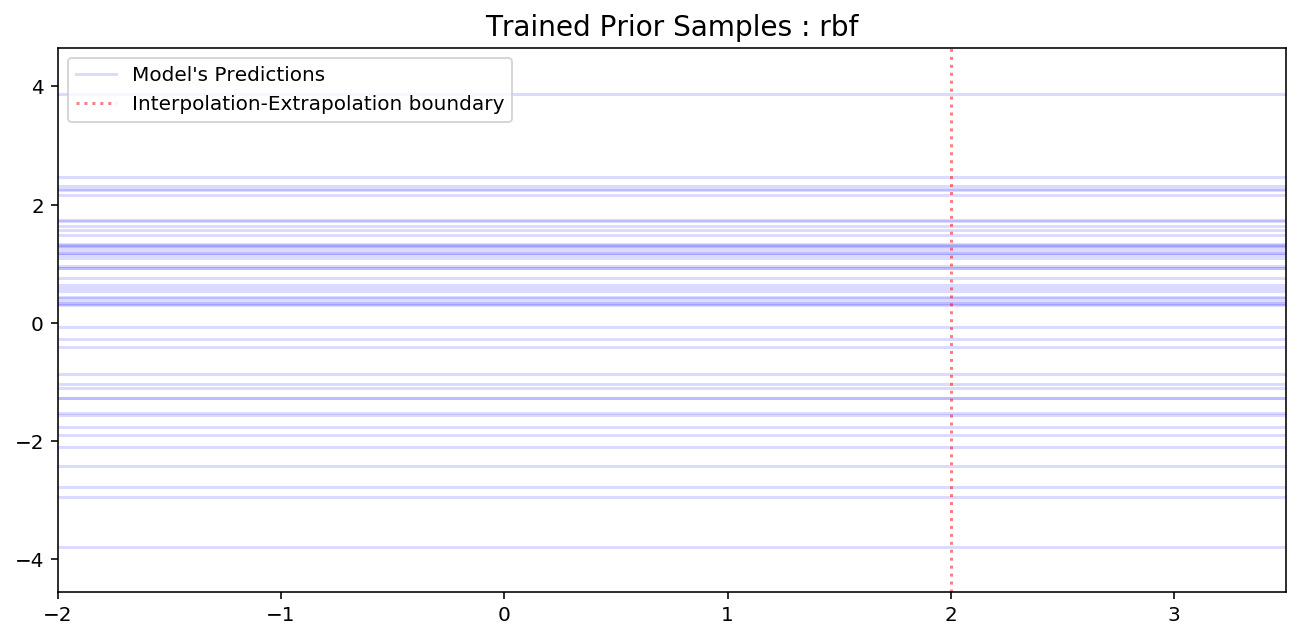

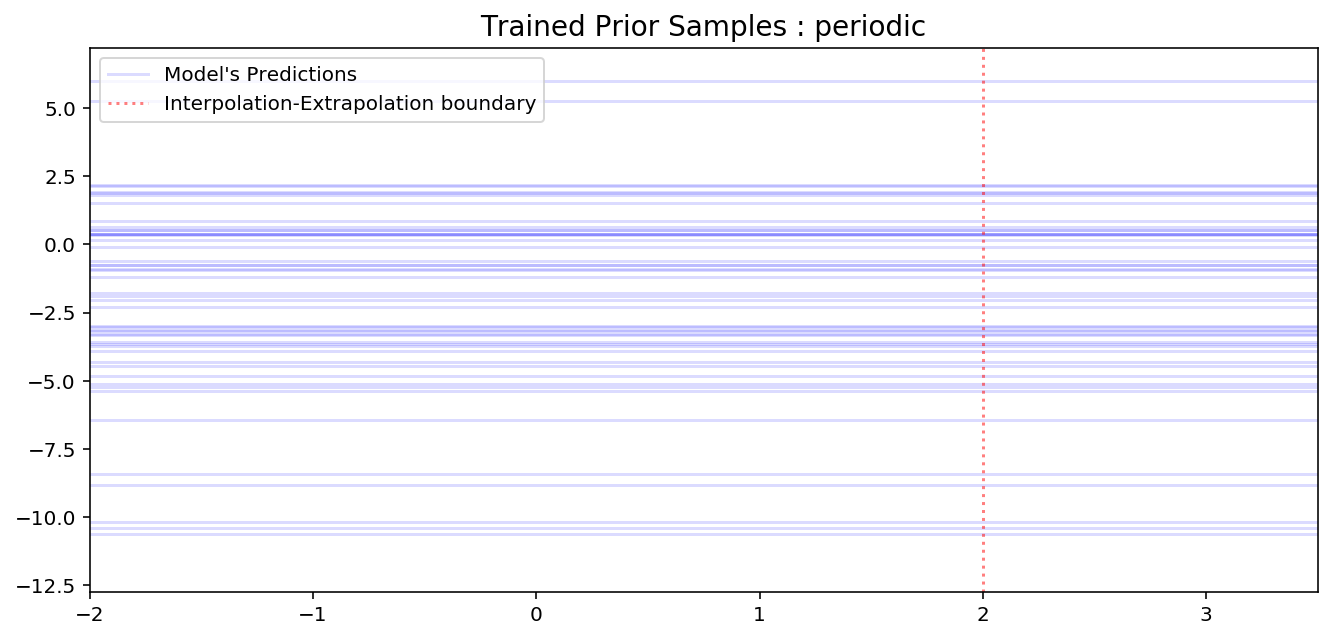

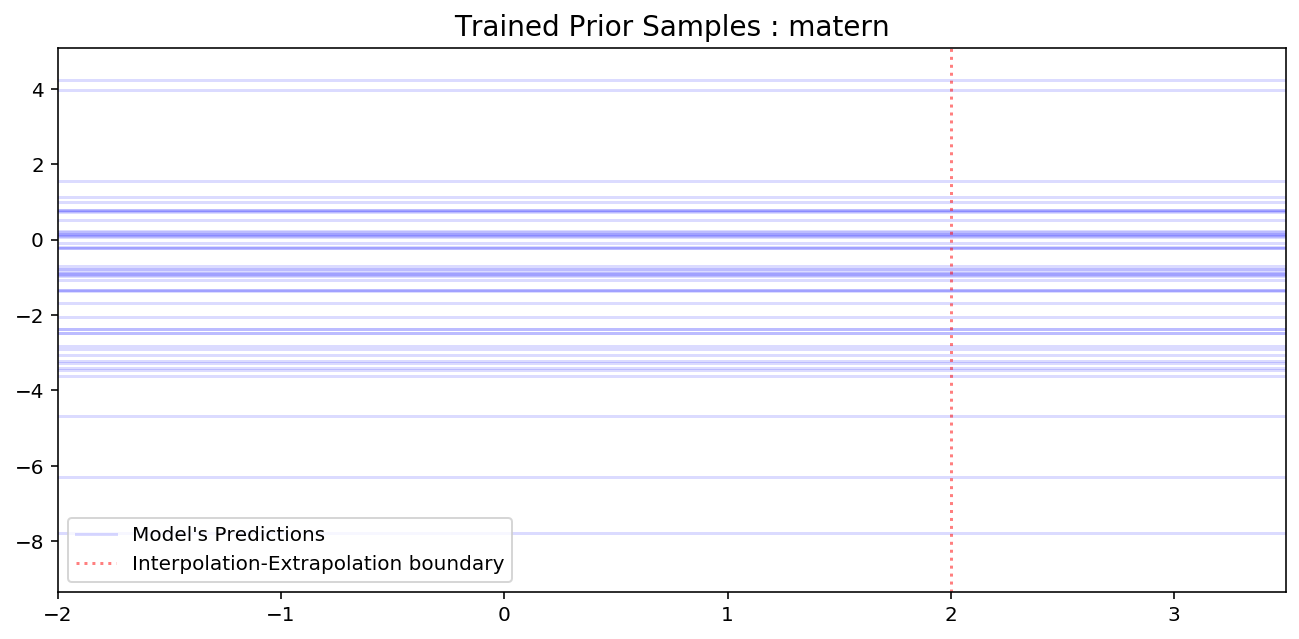

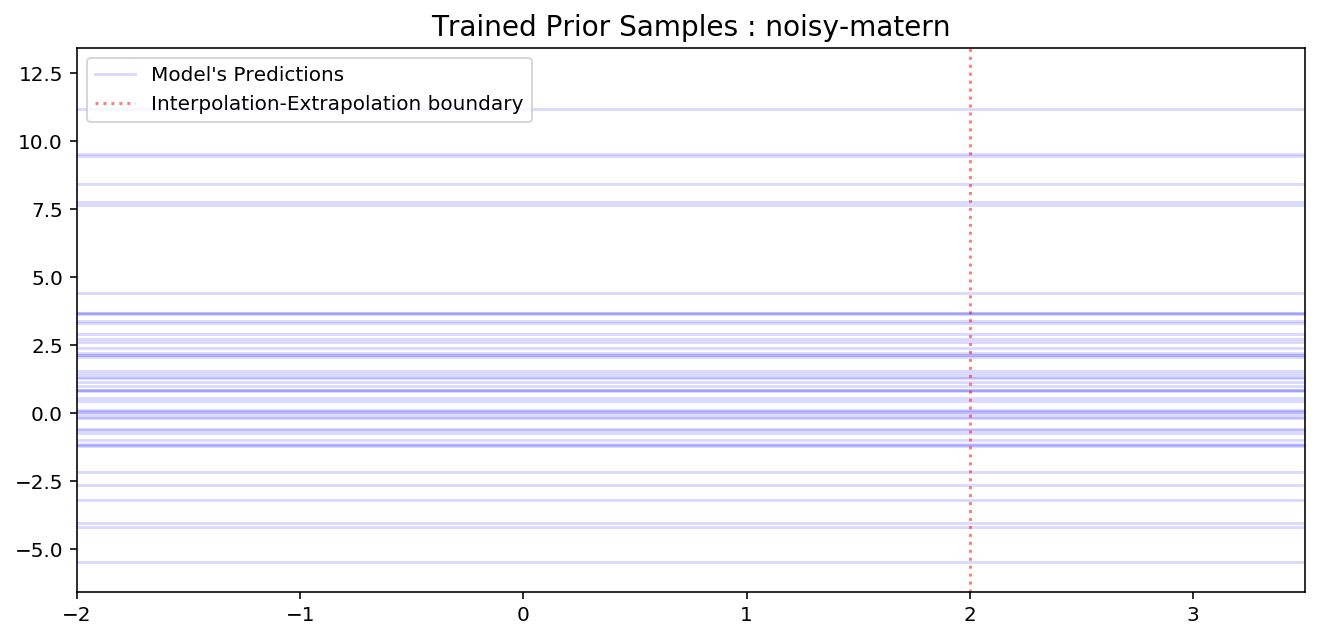

In [19]:
for k,(neural_proc, dataset) in data_models.items():
    plot_prior_samples(neural_proc, 
                       title="Trained Prior Samples : {}".format(k), 
                       test_min_max=EXTRAPOLATION_RANGE, 
                       train_min_max=INTERPOLATION_RANGE)

# Posterior

In [20]:
for k,(neural_proc, dataset) in data_models.items():
    break

In [21]:
torch.nn.functional.softplus(neural_proc.keys_to_tmp_attender.radial_basis_func.length_scale)

tensor([0.0228], grad_fn=<SoftplusBackward>)

In [22]:
from neuralproc.utils.helpers import rescale_range

for k,(neural_proc, dataset) in data_models.items():
    extrap_rescaled_range = tuple(rescale_range(np.array(EXTRAPOLATION_RANGE), (-2,2), (-1,1)))
    neural_proc.extend_tmp_queries(extrap_rescaled_range)

std: 0.7036900520324707
std: 1.0059605836868286
std: 0.17287693917751312
std: 0.43775710463523865


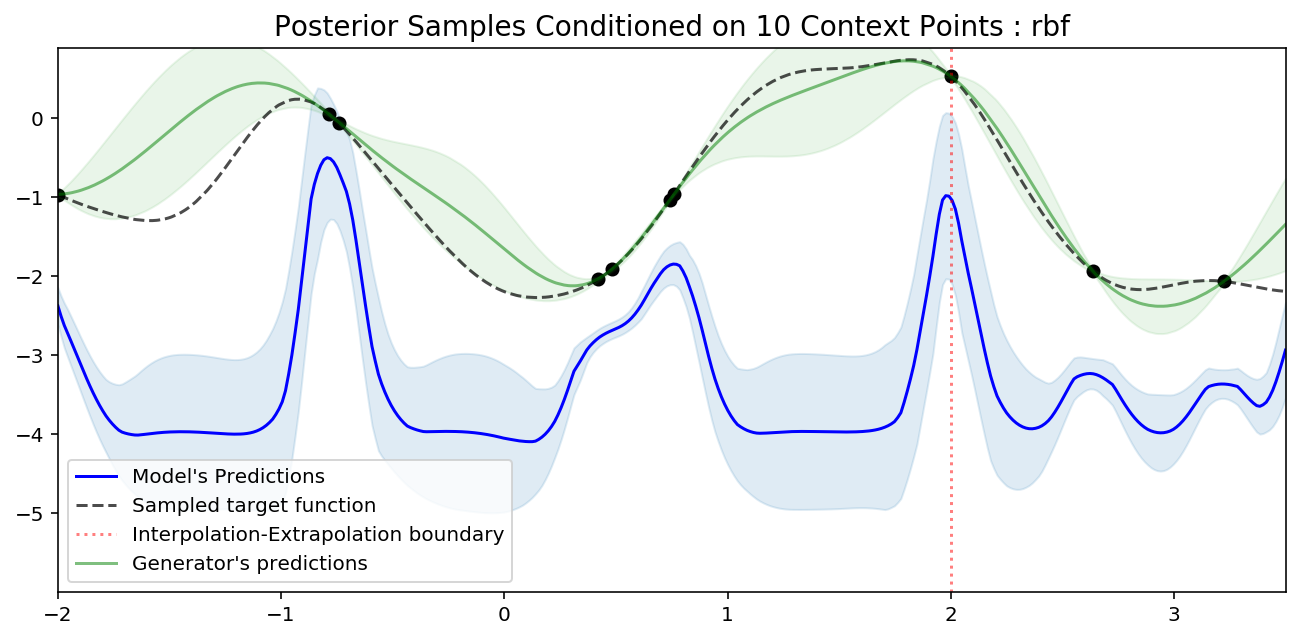

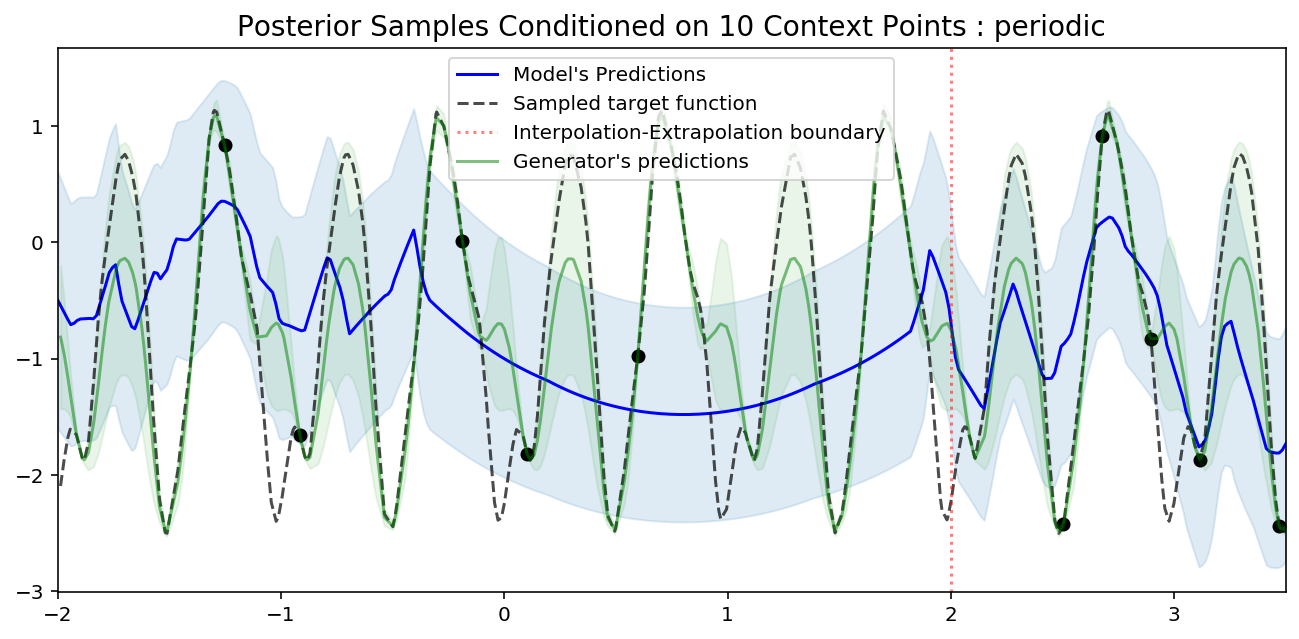

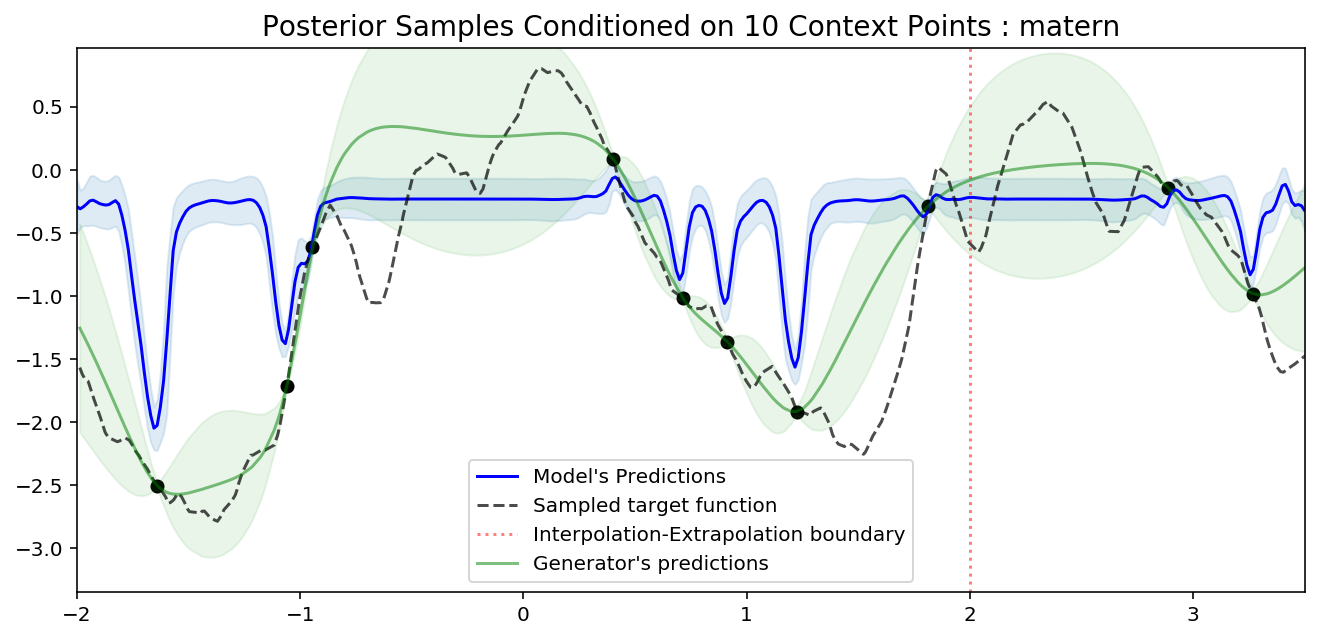

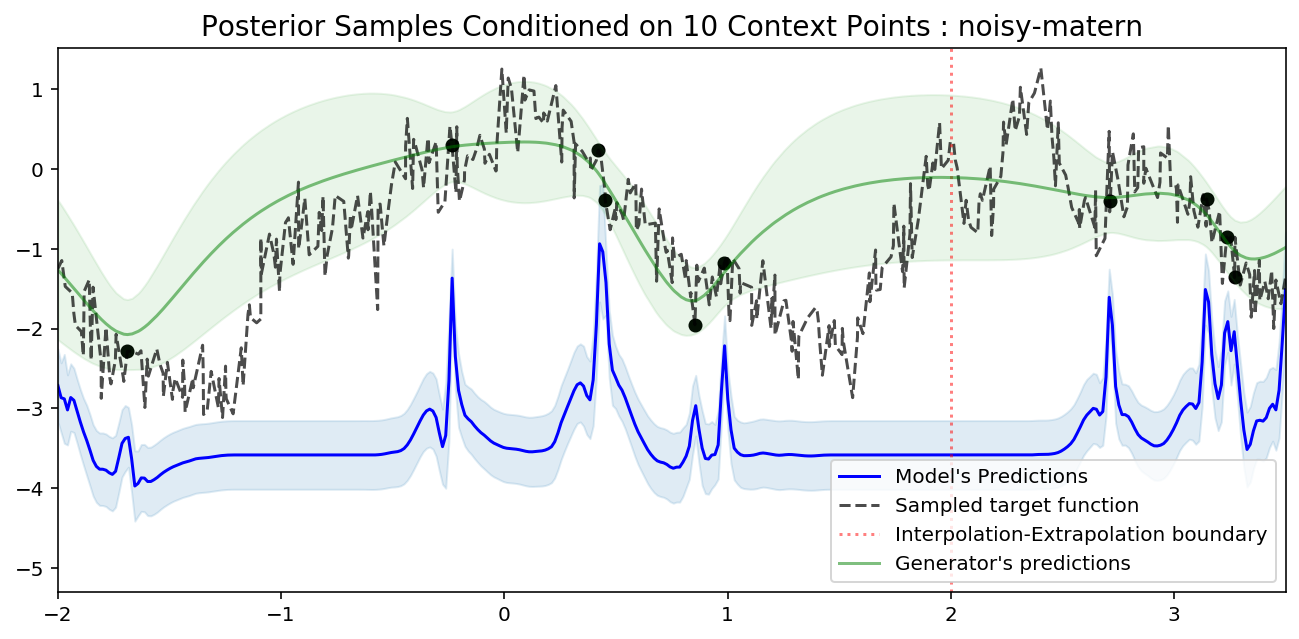

In [23]:
N_CNTXT = 10
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=3*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

In [ ]:
N_CNTXT = 2
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=2*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

In [ ]:
N_CNTXT = 20
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=2*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

In [ ]:
N_CNTXT = 1
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=2*N_POINTS,
                           n_samples=1,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

We see that the predictions are much better than in [Tutorial 2 - Neural Process]

**Good**:
- often close to GP with the correct kernel
- the uncertainty decreases close to context points
- no more underfitting : the sampled function all go through or close to the context points
- does all of this with "only" 50k param (and I did not try to go below).
- very good results after $\sim 5$ epochs

**Bad**:
- there seems be some strange "jumps" in regions far from points. This is probably due to the softmax in cross attention, indicating that a head attends to a new point. This makes the model less smooth than GP, but could probably be solved using self attention or a larger model. 
- cannot extrapolate
- still not as smooth as GP
- not good at periodicity

[Tutorial 2 - Neural Process]: Tutorial%202%20-%20Neural%20Process.ipynb